In [ ]:
# 채무를 불이행할 고객들을 합리적으로 선별해보자구요.
# ...
# 그런데, 정기예금가입을 권유할 때 사용했던 분석 플로우가 왠지 그대로 사용될 수 있을 것만 같아요.
# 그래서 실제로, 정기예금가입문제에서 사용했던 코드를 패키징해서 그대로 재사용해보았습니다! (한방에 나오는 코드)

In [ ]:
# 그리고 결론을 한번 보는 거에요.
# 그냥 한번 주욱 돌리는데 걸리는 시간은 {} 초에 지나지 않아요.
# 즉, 데이터를 심플하게 뜯어보면서 해석하는 데에 드는 노력이 그렇게 크지 않아요. 때문에, '결론을 토대로 생각할 수 있는 시간'을 벌게되었습니다.

In [ ]:
# 이런 류의 문제는 많은 거 같습니다.
# 문제들을 열거하기 - kaggle

# 어떤 상품이나 서비스에 '관심이 있을 법한' 고객들을 그 고객들의 profile 혹은 상품 혹은 서비스에 반응했던 로그들을 이용해서,
# 그것들이 해당 상품이나 서비스에 어떤 영향을 미치는지를 알아내는 류의 일들처럼 
# '무엇에 반응한다 / 그렇지 않다', 더 일반화한다면 'A 이다. / B 이다.' 를 가려내는 일들 말이죠.

In [ ]:
# 게다가 이런 류의 문제의 본질에 다가가는 데에, "가설을 세우고 그것을 데이터로 증명하기" 라는 과정을 당연히 반복하게 됩니다.
# 이 반복은 대단히 중요해서, '이 과정에 대한 반복의 빈도'가 높으면 높을 수록, 더 많은 생각 그리고 그 생각에 대한 실험으로 본질에 다가가는 근거들이 탄탄해지게 되죠.
# 하지만 생각을 실험하는 하나의 사이클 자체가 길어지게 된다면, 생각 자체도 느려지고 본질에 다가서는 근거도 부족해지게 됩니다.

In [ ]:
# 때문에, "생각을 실험하는 과정" 을 더욱 "정형화 -> 자동화" 해내기가 중요해질 수 있습니다.
# 타당한 근거들을 되도록 빨리 하지만 지속적으로 확보한 후,
# 그것을 토대로 기존에 이루어지지 않았던 프로세스를 만들어내거나, 혹은 프로세스를 개선하게 하는 고민' 에 대한 시간을 계속 확보하려면 말이죠.

In [ ]:
# 이 관점에서 지금까지 경험했던 문제들을 구조화시켜봅시다.
# 1) 데이터 ...
# ...
# ...
# 1 ~ ... 루프

In [ ]:
# 각 과정에서는 이런 것들을 유심히 보지 않을 까 싶습니다.

In [ ]:
# 

In [ ]:
#칼럼에 대한 소개

# BAD
# 1 = client defaulted on loan 0 = loan repaid

# Boolean
# LOAN
# Amount of the loan request

# Numeric
# MORTDUE
# Amount due on existing mortgage

# Numeric
# VALUE
# Value of current property

# Numeric
# REASON
# DebtCon = debt consolidation HomeImp = home improvement

# String
# JOB
# Six occupational categories

# String
# YOJ
# Years at present job

# Numeric
# DEROG
# Number of major derogatory reports

# Numeric
# DELINQ
# Number of delinquent credit lines

# Numeric
# CLAGE
# Age of oldest trade line in months

# Numeric

# NINQ
# Number of recent credit lines

# Numeric
# CLNO
# Number of credit lines

# Numeric
# DEBTINC
# Debt-to-income ratio

# Numeric

In [ ]:
# 정답의 분포
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# 카운트로 본다면
stat = loan.groupby('deposit').size().reset_index().rename(columns = {0 : 'cnt'})
_, ax = plt.subplots(figsize = (10, 5))
stat.plot(kind = 'bar', x = 'deposit', y = 'cnt', ax = ax, cmap = 'plasma', rot = 0)
stat

## 가입권유, 막 하지 말자구요.

- 정기예금에 가입하세요! 라는 메시지를 '전화'라는 수단을 이용해서 전달하는 것은 참 쉽지 않은 마케팅 중 하나일 것이다.
- 여기에서는 anonymous 한 사람들에게 무작위로 전화하는 방법 대신,

  - 1) 정기예금가입이라는 아이템을 전화로 전달했을 때, 얼마나 '긍정적'으로 반응할 것인가? 에 대한 스코어링 모델을 만들고
  - 2) 이 모델이 얼마나 타당한지? 를 검토한 후
  - 3) 게다가 높은 스코어를 얻은 사람들은 왜 그런 스코어를 얻게 되었는지 파악하는 과정을 통해
  - 4) 효과적인 마케팅 활동을 하는 것을 목표로 한다

## 1) 먼저 데이터가 어떻게 생겼는 지 한번 보는 거에요

- 사용된 데이터는 bank.csv 이겁니다. https://www.kaggle.com/kevalm/predictive-bank-marketing-analysis/data

In [1]:
!head -n 5 ../bank.csv
import pandas as pd
bank = pd.read_csv("../bank.csv", sep = ",", error_bad_lines = False)
bank.head(5)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

## 칼럼들을 소개하면 아래와 같구요.

- 1 - age: 나이
- 2 - job: 직업 (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital: 결혼여부 (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education: 교육수준 (categorical: primary, secondary, tertiary and unknown, 뭐 고등교육이냐 등등)
- 5 - default: 이 은행명으로 신용카드 등록되어 있는지? (categorical: 'no','yes','unknown')
- 6 - housing: 이 은행에서 주택자금대출을 받았는지 (categorical: 'no','yes','unknown')
- 7 - loan: 개인신용대출이 있는지? (categorical: 'no','yes','unknown')
- 8 - balance: 이 은행명으로 계좌가 있고, 거기에 얼마나 금액이 있는지?
- 8 - contact: 권유할 때 이전에 유선전화/휴대폰 둘 중 어떤 수단으로 컨택했는지? (categorical: 'cellular','telephone') 
- 9 - month: 언제 최근에 컨택했는지 (월) (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day: 언제 최근에 컨택했는지 (일) (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: 컨택했을 때 얼마나 전화통화 길게 했는지 (초단위) Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- 12 - campaign: 뭐랄까 이 고객에 대한 마케팅 캠페인을 얼마나 진행했었는지 (그 수단이 메일이든 뭐든) (numeric, includes last contact)
- 13 - pdays: 이 고객에게 캠페인을 한지 얼마나 지났나? (일) (numeric; 999 means client was not previously contacted)
- 14 - previous: 직전 캠페인할 때 얼마나 전화컨택을 했는지 (numeric)
- 15 - poutcome: 직전 캠페인 성공여부 (categorical: 'failure','nonexistent','success')

- (target) - y - 정기예금 그래서 가입했어? has the client subscribed a term deposit? (binary: 'yes','no')

## 2) 그리고 정답이 어떻게 분포되어 있는 지 볼거에요.

- 뭔가 imbalanced 되지 않았네요 => 아주 예쁘게 생겼어요
- 나중에 학습시키거나 할 때 resampling 하지 않아도 ... 되겠다는 말이죠

deposit   cnt
0      no  5873
1     yes  5289

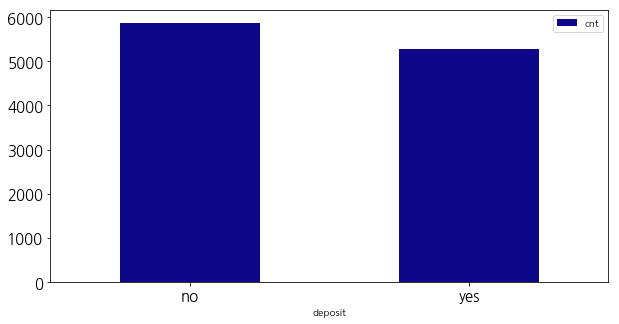

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# 카운트로 본다면
stat = bank.groupby('deposit').size().reset_index().rename(columns = {0 : 'cnt'})
_, ax = plt.subplots(figsize = (10, 5))
stat.plot(kind = 'bar', x = 'deposit', y = 'cnt', ax = ax, cmap = 'plasma', rot = 0)
stat

## 3) 데이터에 결측치가 있는지 확인을 해볼테구요

- 오, 명시적으로 보기에는 없군요. 대박! => 어 이럴리가 없을텐데 ...

In [3]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## 4) 칼럼 별로 어떤 분포를 가지고 있는지 한번 주욱 볼 거에요.

- 오. 역시 unknown 이라는 라벨이 붙어있구만요. => 이게 바로 결측치일겁니다.
- 아직 눈에 들어오지는 않는데, "데이터가 이렇게 생겨먹었어요."
    - 많이 들 결혼했구만요.
    - 중등교육까지 받은 사람들이 많구..
    - 어? 신용카드 (default) 는 대부분 안만들었군요. 개인대출도 거의 없구요.
    - 주로 핸드폰으로 마케팅 채널을 썼구요. 등

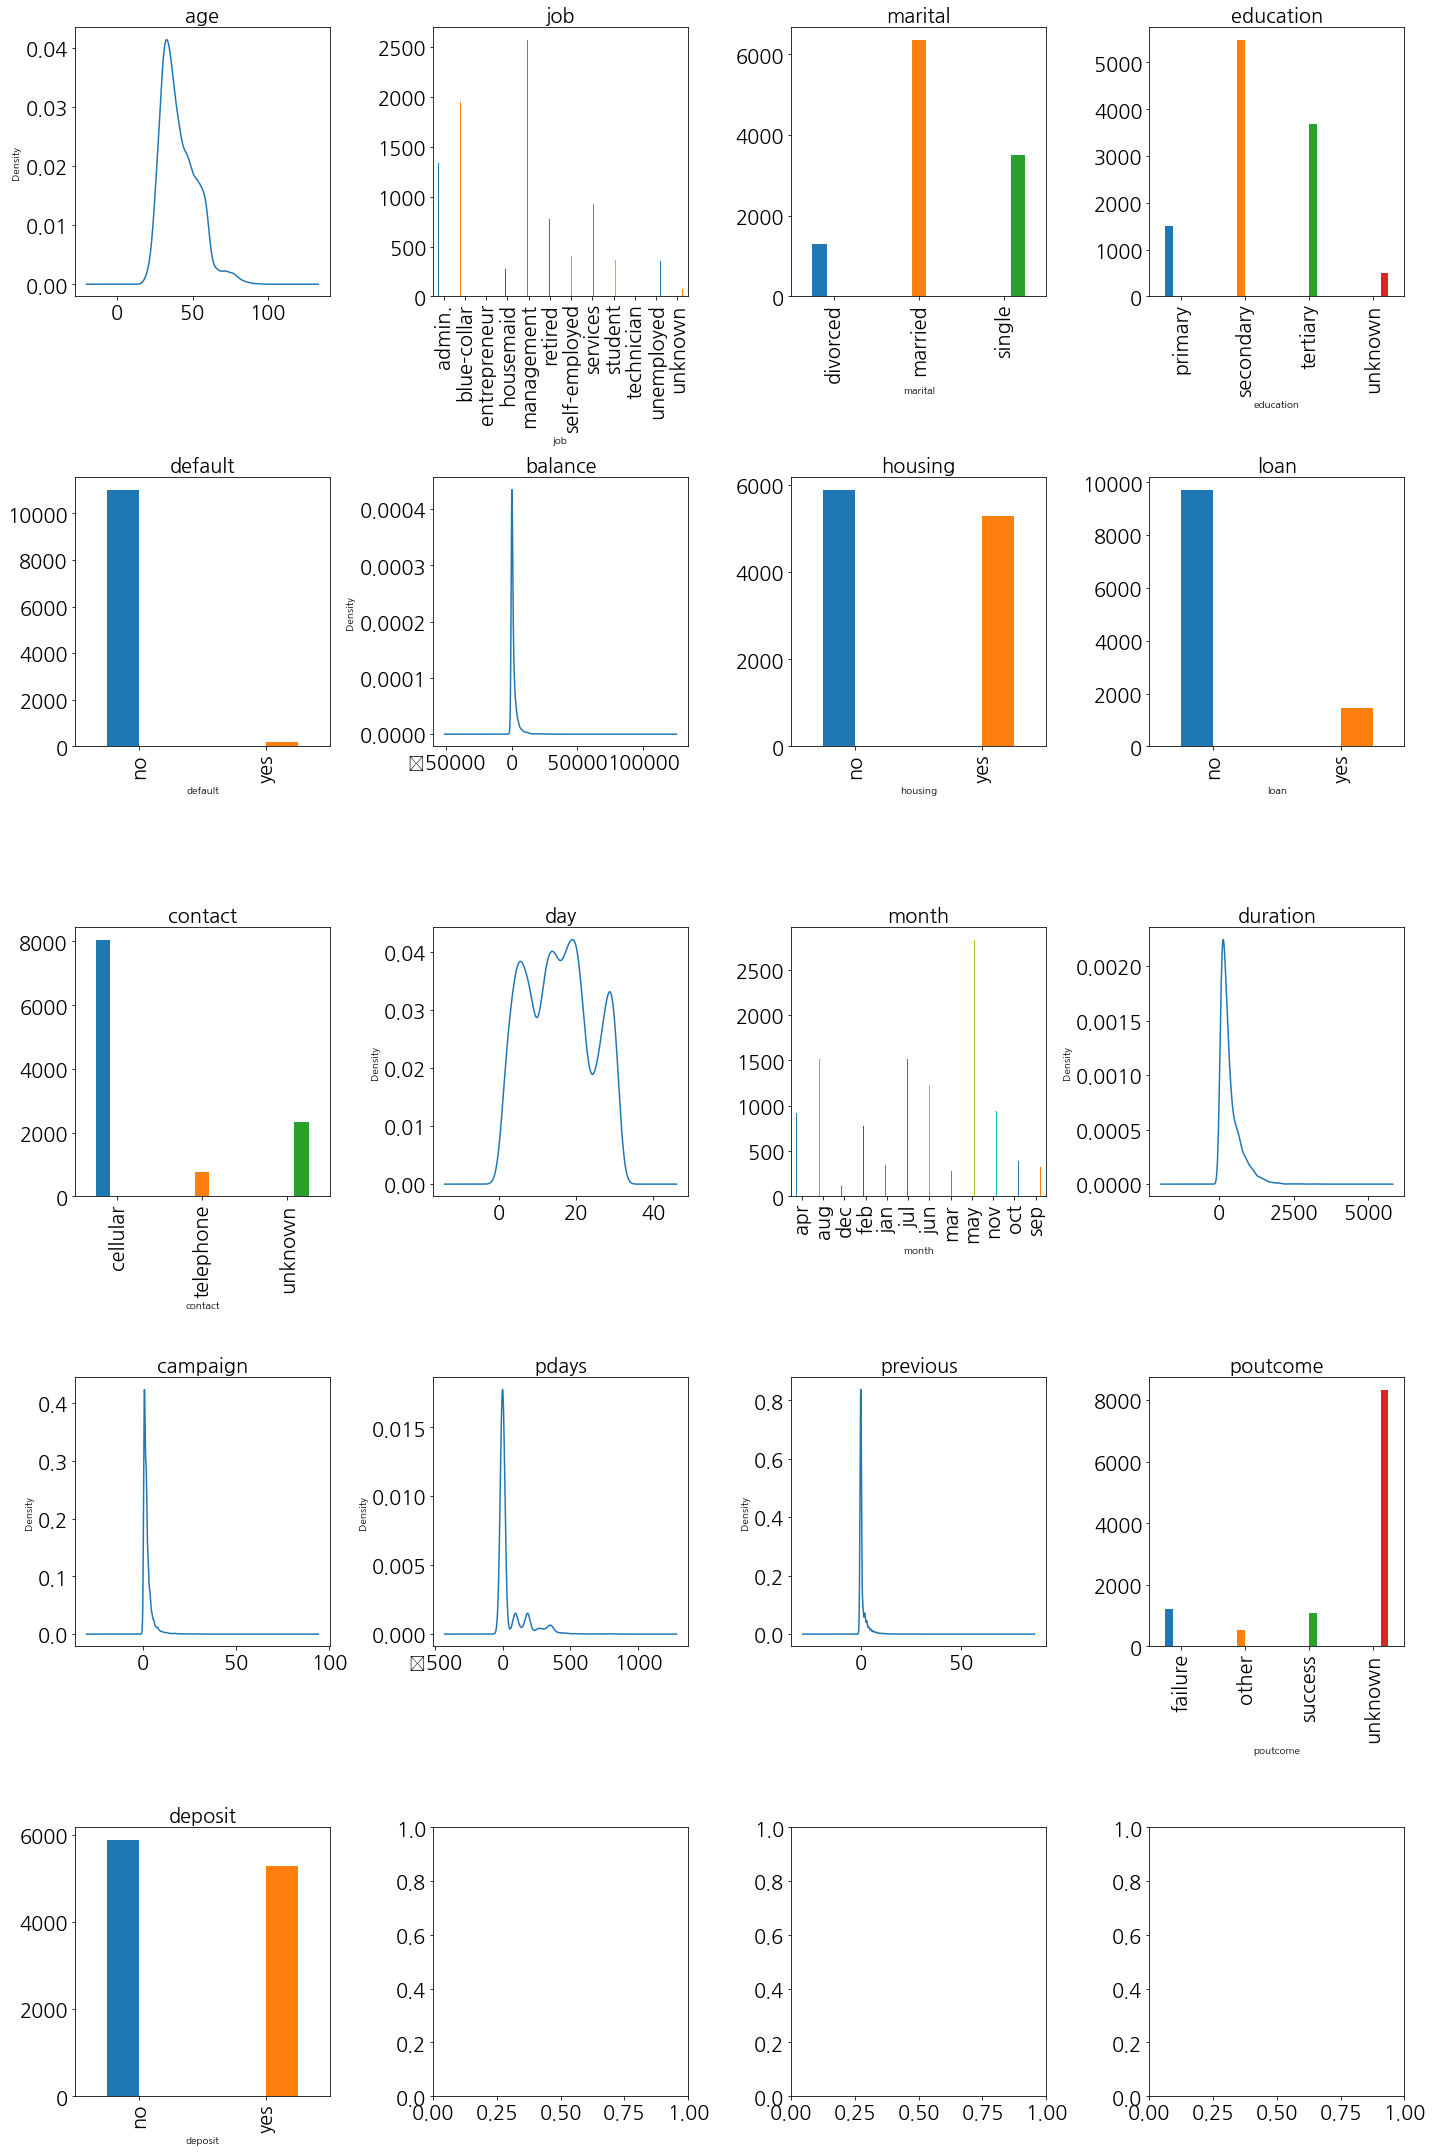

In [9]:
# histogram
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

_, ax = plt.subplots(5, 4, figsize = (20, 30))
cnt = 0
for col in bank.columns:
    cnt = cnt + 1
    idx = int((cnt-1) / 4 + 1)
    idy = int((cnt-1) % 4 + 1)
    if bank[col].dtype == 'int64':
        bank[col].plot(kind = 'kde', ax = ax[ idx - 1, idy - 1 ])
    elif bank[col].dtype == 'object':
        bank.groupby(col)[col].value_counts().unstack(0).plot(kind = 'bar', ax = ax[ idx - 1, idy - 1 ], rot = 90, legend = False)
    else:
        continue
    ax[ idx - 1 , idy - 1 ].set_title(col, size = 20)
plt.tight_layout()

## 5) 보면서 관찰된 'unknown' 같은 결측치를 가지고 있는 칼럼들을 처리해야해요.

- job, education, contact, poutcome 이런 칼럼들이에요.
- poutcome 은 unknown 이 너무 많으니까 => 이건 내비러두고, 나머지 칼럼들은 최빈값을 넣어줍시다.

job
education
contact
poutcome


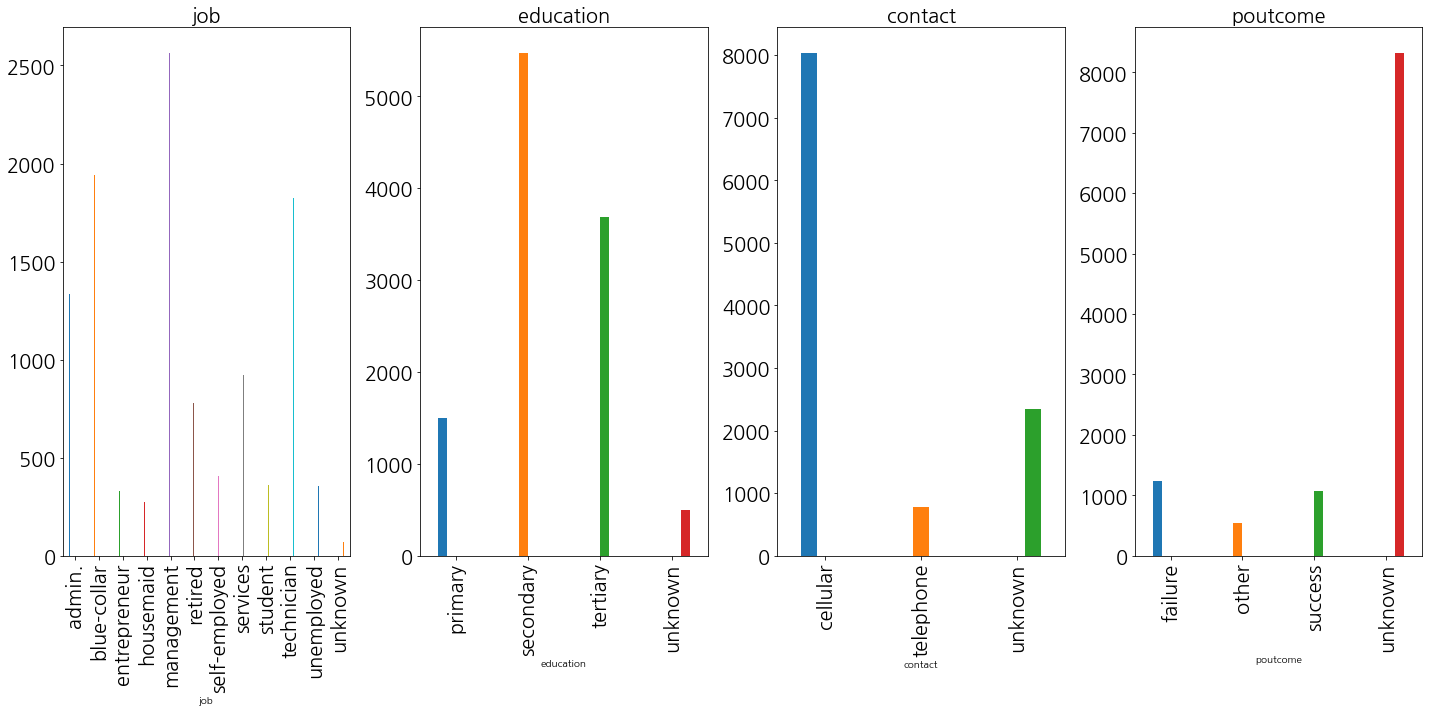

In [12]:
# unknown 같은 것들이 보인다 => 이런 값들이 있는 칼럼들을 확인해보자
# 이런 것들을 채워넣어보자
for col in bank.columns:
    if bank[col].dtype == 'object':
        if 'unknown' in [v.lower() for v in bank[col].unique()]:
            print(col)

_, ax = plt.subplots(1, 4, figsize = (20, 10))
cnt = 0
for col in ['job', 'education', 'contact', 'poutcome']:
    
    cnt = cnt + 1
    idx = int((cnt-1) / 4 + 1)
    idy = int((cnt-1) % 4 + 1)
    
    bank.groupby(col)[col].value_counts().unstack(0).plot(kind = 'bar', ax = ax[ idy - 1 ], rot = 90, legend = False)
    ax[ idy - 1 ].set_title(col, size = 20)
plt.tight_layout()

### unknown 이라고 마킹된 결측치를 최빈값으로 넣어주자구요

In [13]:
dispose_cols = ['job', 'education', 'contact']
for col in dispose_cols:
    most_common = pd.get_dummies(bank[col].dropna()).sum().sort_values(ascending = False).index[0]
    def replace_most_common(x):
        if x == 'unknown':
            return most_common
        else:
            return x
    bank[col] = bank[col].map(replace_most_common)

## 6) 이제 정기예금 = yes / no 에 따라서 값의 차이가 큰 변수가 뭔지 한번 보는 거에요.

- 눈으로 보기에는, age, day, duration, pdays 가 차이가 있어보이네요.
- 그런데, 이 차이가 얼마나 큰 건지 그래서 어떤 변수가 차이를 많이 발생시키고 있는지 눈으로 봐서는 알 수가 없어요.

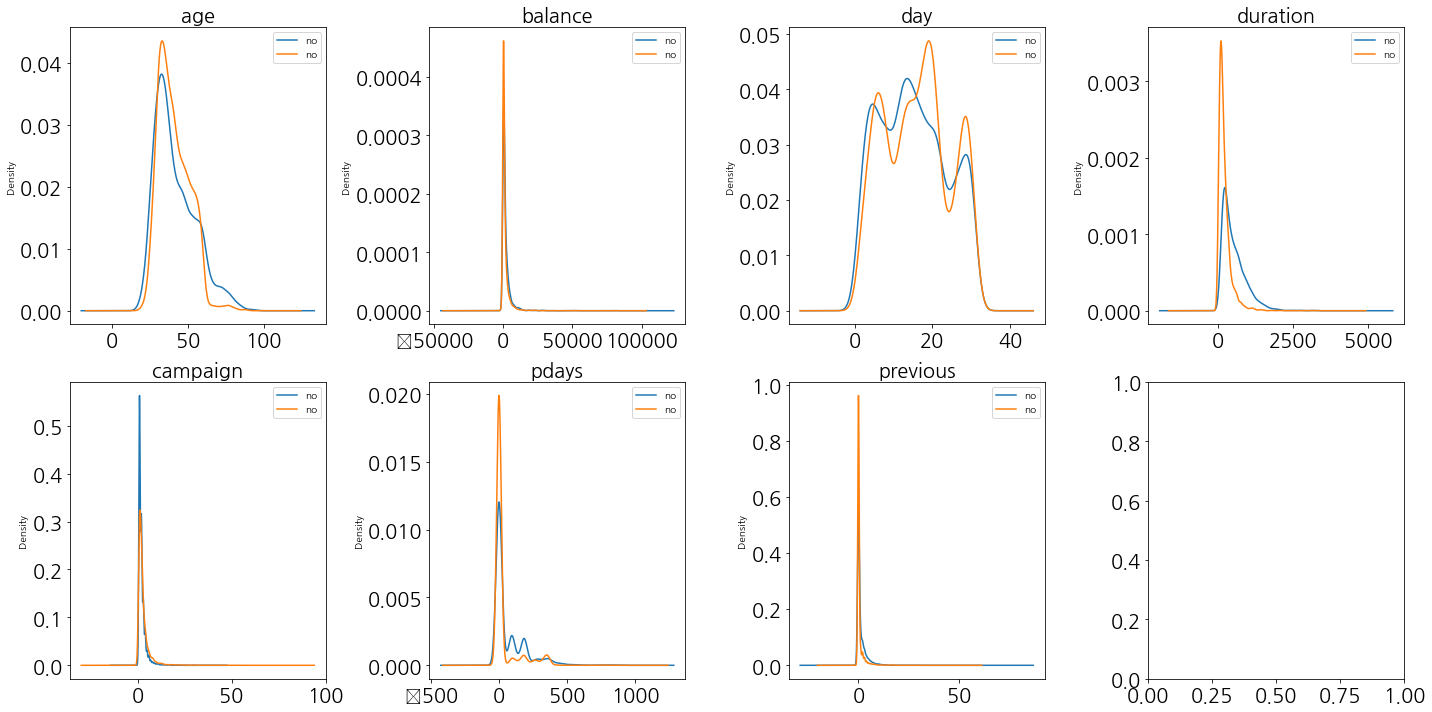

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
_, ax = plt.subplots(2, 4, figsize = (20, 10))
cnt = 0
for col in bank.columns:
    if bank[col].dtypes != 'object':
        cnt = cnt + 1
        idx = int((cnt-1) / 4 + 1)
        idy = int((cnt-1) % 4 + 1)
        bank[bank.deposit == 'yes'][col].plot(kind = 'kde', ax = ax[idx-1, idy-1], label = bank.deposit.unique()[-1])
        bank[bank.deposit == 'no'][col].plot(kind = 'kde', ax = ax[idx-1, idy-1], label = bank.deposit.unique()[-1])
        ax[idx - 1, idy - 1].set_title(col, size = 20)
        ax[idx - 1, idy - 1].legend()
        
plt.tight_layout()

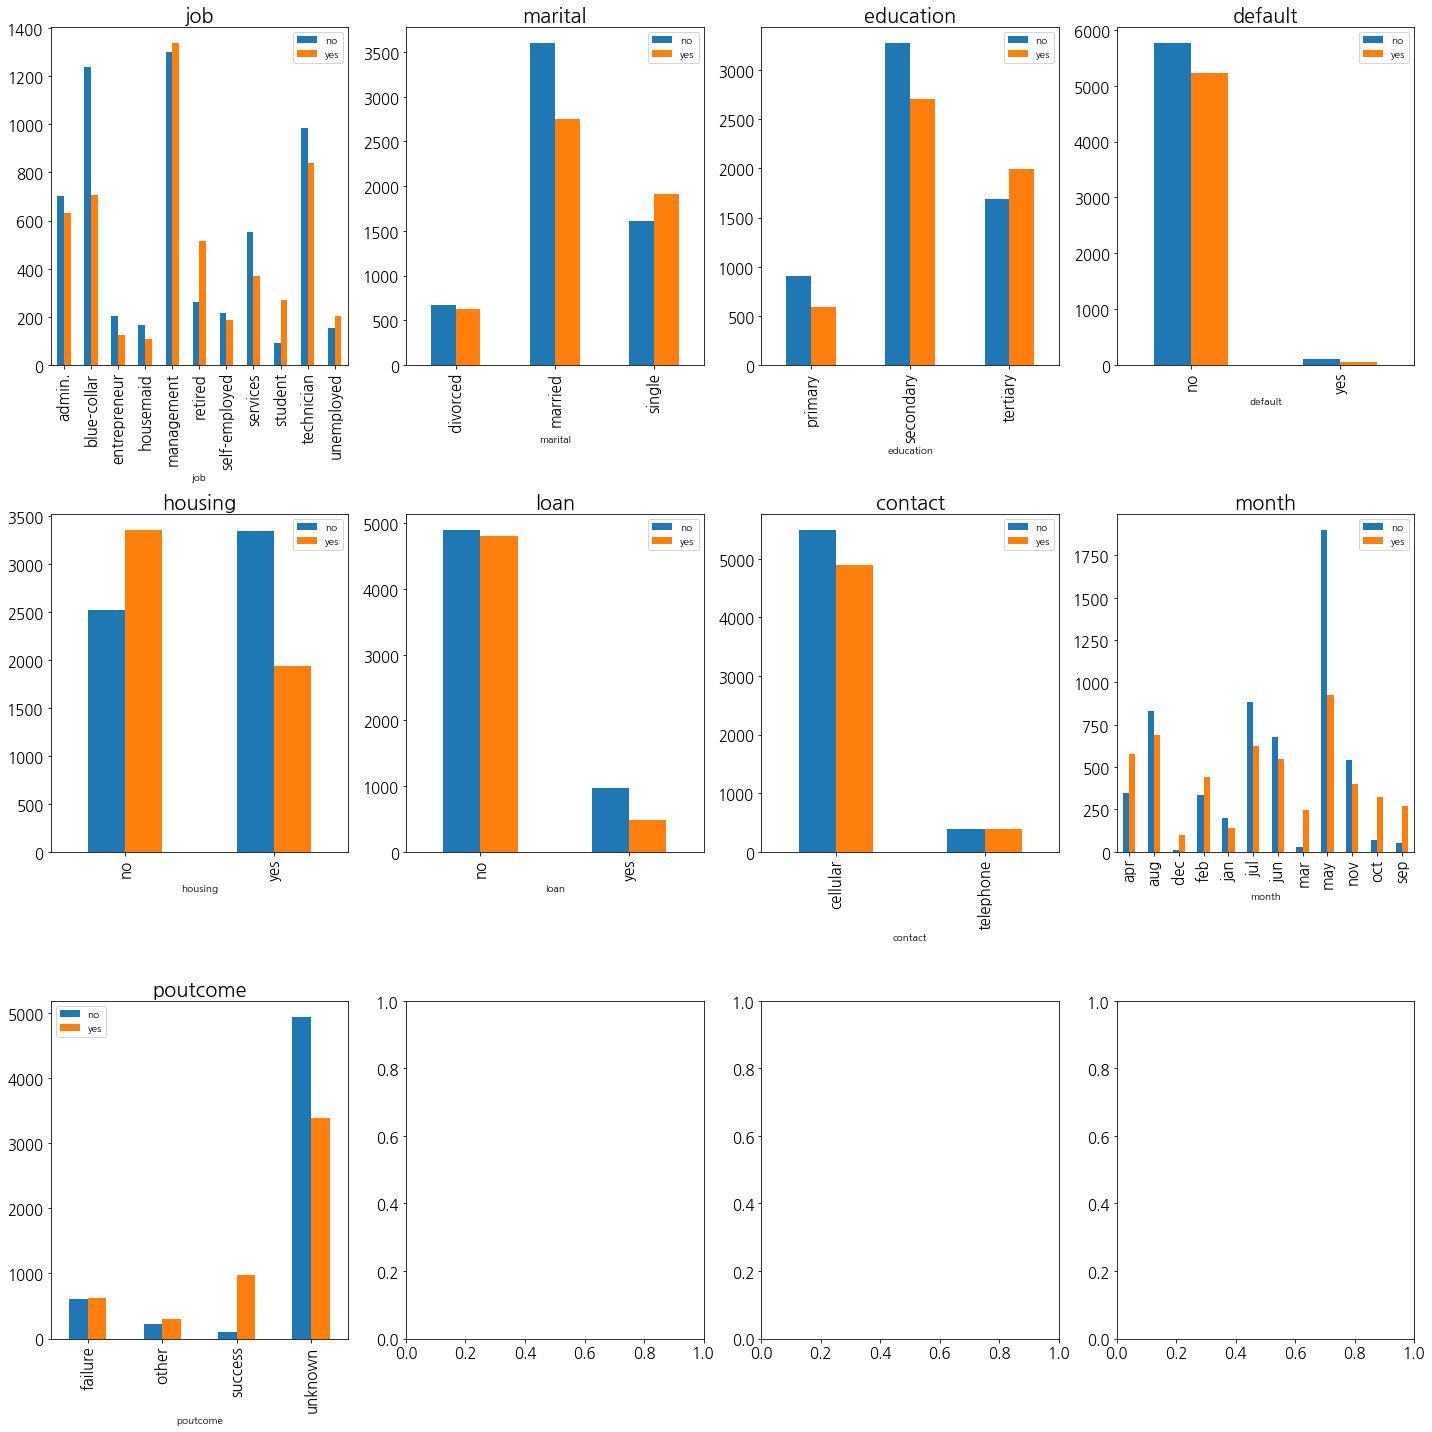

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
_, ax = plt.subplots(3, 4, figsize = (20, 20))
cnt = 0
for col in bank.columns:
    if col == 'deposit':
        continue
    if bank[col].dtypes == 'object':
        cnt = cnt + 1
        idx = int((cnt-1) / 4 + 1)
        idy = int((cnt-1) % 4 + 1)
        bank[[col, 'deposit']].groupby('deposit')[col].value_counts().unstack(0).\
        plot(kind = 'bar', ax = ax[idx-1, idy-1])
        ax[idx - 1, idy - 1].set_title(col, size = 20)
        ax[idx - 1, idy - 1].legend()
        
plt.tight_layout()

## 7) 차이를 측정해보죠. 그래서 차이가 큰 변수가 뭔지 정렬해서 보는 겁니다.

- 분포 간의 차이를 조망하고 싶으니까 => kl divergence 정도 이용해봅시다.
- duration > balance > age > day > campaign .... 순으로 나래비가 세워지네요.

In [15]:
# kl divergence 보기 + 정렬
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats

def kl(p, q):
    return stats.entropy(p, q)

def _get_kl_metric(df, col, dtype, bin_size = None):
    if bin_size is None:
        bin_size = 30
    df1 = df[df.deposit == 'yes']
    df2 = df[df.deposit == 'no']
    if dtype == 'int64':
        df1_s, _ = np.histogram(df1[col], bins = range(bin_size))
        df2_s, _ = np.histogram(df2[col], bins = range(bin_size))
#         sample_size = min(df1[col].shape[0], df2[col].shape[0])
#         df1_s = df1[col].sample(n = sample_size)
#         df2_s = df2[col].sample(n = sample_size)
    elif dtype == 'object':
        bin_size = 3
        df1_s, _ = np.histogram(df1.groupby(col).size(), bins = range(bin_size))
        df2_s, _ = np.histogram(df2.groupby(col).size(), bins = range(bin_size))
    return kl(df1_s, df2_s)

ret_kl = []
for col in bank.columns:
    if col == 'deposit':
        continue
    tmp = {
        'col' : col,
        'kl'  : _get_kl_metric(bank, col, bank[col].dtypes)
    }
    ret_kl.append(tmp)
ret_kl = pd.DataFrame(ret_kl)
ret_kl.kl = ret_kl.kl.apply(lambda x : 0 if x == np.inf else x)
ret_kl.sort_values('kl', ascending = False)

col        kl
11   duration  1.768235
5     balance  0.073098
0         age  0.070573
9         day  0.067748
12   campaign  0.040936
1         job  0.000000
2     marital  0.000000
3   education  0.000000
4     default  0.000000
6     housing  0.000000
7        loan  0.000000
8     contact  0.000000
10      month  0.000000
13      pdays  0.000000
14   previous  0.000000
15   poutcome  0.000000

## 8)  이번에는 변수들을 하나씩 보지말고 pair 로 보면서, 차이를 발생시키는 게 뭔지 볼까요?

- 아래 조합으로 녹색점과 파란색점이 잘 구분된다라는 것을 역시 확인할 수 있네요!
- 1) pdays + age
- 2) pdays + day
- 3) pdays + duration
- 4) duration + day
- 이렇게 말이죠.

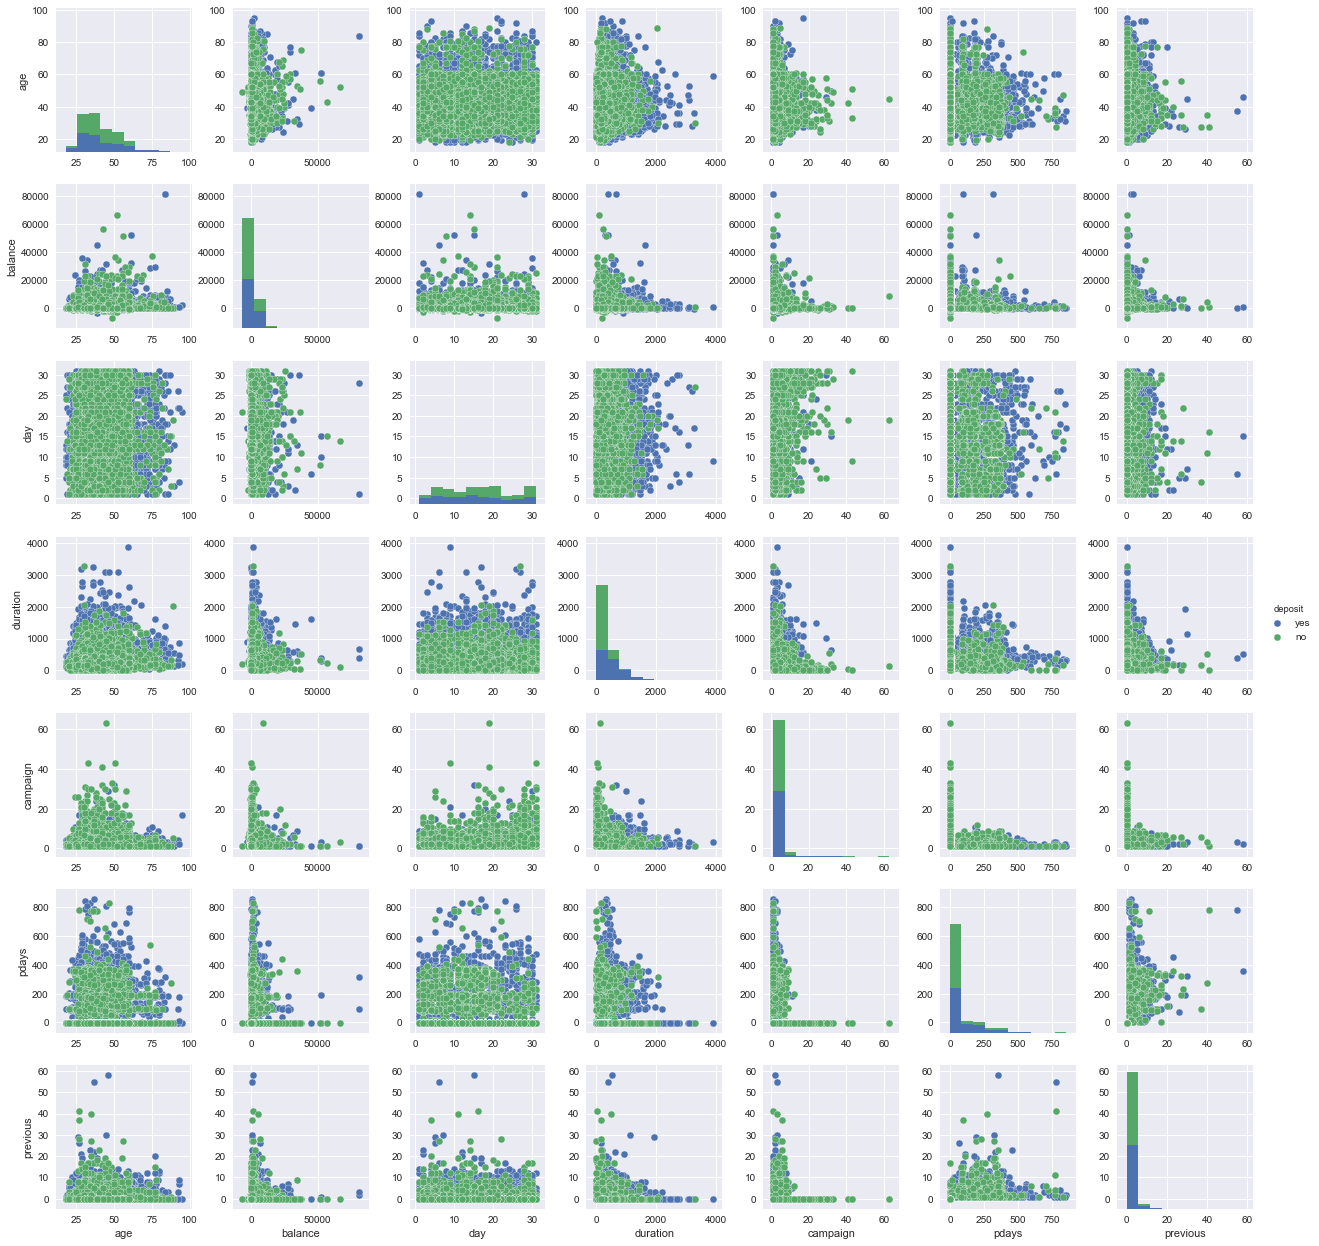

In [5]:
# 영향을 주는 변수들에 대한 조사해보기
plt.rcParams['legend.fontsize'] = 15
# scatter plot 으로 한꺼번에 볼 수는 없을까? => 일일이 다 그리기 싫어
import seaborn as sns
sns.set()
grid = sns.pairplot(bank, hue="deposit")

## 9) 그 조합만 다시 띄어내어서 보죠

- 그 조합을 리마인더 하면
    - 1) pdays + age
    - 2) pdays + day
    - 3) pdays + duration
    - 4) duration + day
- 오 더 잘 보이긴 합니다.

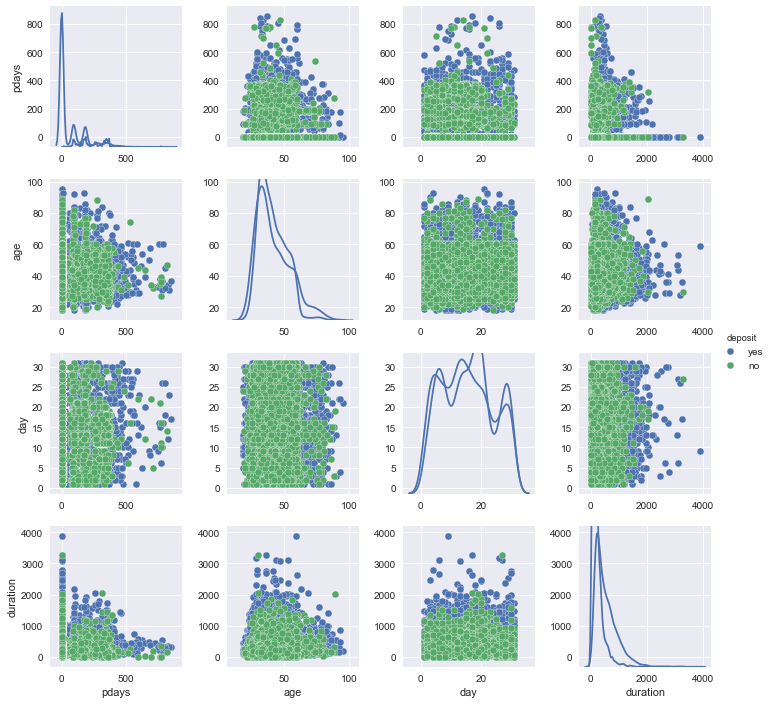

In [19]:
import seaborn as sns
sns.set()
grid = sns.pairplot(bank[['pdays', 'age', 'day', 'duration', 'deposit']], hue="deposit", diag_kind = 'kde')

## 10) 오케이, 이 변수 4개로 일단 모델링 해보는 거에요.

- precision : .77, recall : .76 정도 되네요.
- 10번 정기예금가입자야! 라고 판단해준다면 그 중에 7번정도 맞추는 모델입니다. (게다가 커버리지도 76% 정도 되는 군요.)
- 어쨌든, 이걸 베이스라인으로 삼읍시다. 즉, 이거보다는 잘 맞추게 만들어보는거에요.

In [41]:
# 일단 4가지 변수를 넣고 모델링해보기
df = bank[['pdays', 'age', 'day', 'duration', 'deposit']]
df.head(5)

pdays  age  day  duration deposit
0     -1   59    5      1042     yes
1     -1   56    5      1467     yes
2     -1   41    5      1389     yes
3     -1   55    5       579     yes
4     -1   54    5       673     yes

In [42]:
df['target'] = df.deposit.apply(lambda x : True if x == 'yes' else False)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[col for col in df.columns if col not in ['deposit', 'target']]],
                                                    df['target'], test_size = 0.33)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, n_jobs = 4)
model.fit(x_train, y_train)

print(y_test.reset_index().groupby('target').size())
y_predict = model.predict(x_test)
y_predict_score = model.predict_proba(x_test)[:, 1]
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
print("Accuracy : {}, AUC : {}, Precision : {}, Recall : {}".format(
    accuracy_score(y_test, y_predict),
    roc_auc_score(y_test, y_predict_score),
    precision_score(y_test, y_predict),
    recall_score(y_test, y_predict)
))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

target
False    1924
True     1760
dtype: int64
Accuracy : 0.7847448425624322, AUC : 0.8502595799470799, Precision : 0.7730095990965556, Recall : 0.7778409090909091


array([[1522,  402],
       [ 391, 1369]])

## 11) 저 베이스라인모델을 이기기위한 고민을 한번 해보죠.

- 변수들을 추가하는 일이 있을거에요.
    - 1) kl divergence 로 정렬된 변수 중에 balance, day, campaign 같은 변수는 추가 안했었죠.
    - 2) 게다가 카테고리형 변수들은 다 더미화시켜서 변수화해보는거에요.
    
- 오, 각각 precision : recall = .78 / .8 => precision : recall = .82 / .87 까지 올라갑니다.

In [43]:
# 1) 일단 kl divergence 기준으로 높았던 변수들을 다 넣어보니 => .8 로 상승
df = bank[['pdays', 'age', 'day', 'duration', 'balance', 'day', 'campaign', 'deposit']]
df['target'] = df.deposit.apply(lambda x : True if x == 'yes' else False)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[col for col in df.columns if col not in ['deposit', 'target']]],
                                                    df['target'], test_size = 0.33)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, n_jobs = 4)
model.fit(x_train, y_train)

print(y_test.reset_index().groupby('target').size())
y_predict = model.predict(x_test)
y_predict_score = model.predict_proba(x_test)[:, 1]
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
print("Accuracy : {}, AUC : {}, Precision : {}, Recall : {}".format(
    accuracy_score(y_test, y_predict),
    roc_auc_score(y_test, y_predict_score),
    precision_score(y_test, y_predict),
    recall_score(y_test, y_predict)
))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

target
False    1953
True     1731
dtype: int64
Accuracy : 0.8007600434310532, AUC : 0.8801937974521415, Precision : 0.7783361250697934, Recall : 0.805314846909301


array([[1556,  397],
       [ 337, 1394]])

In [16]:
# 2) 카테고리 변수도 모두 넣어보니 => .848 로 상승
df = pd.concat([bank[bank.columns[bank.dtypes == 'int']], pd.get_dummies(bank[[col for col in bank.columns[bank.dtypes == 'object'] if col != 'deposit']])],
          axis = 1)
df = pd.concat([df, bank['deposit']], axis = 1)
df['target'] = df.deposit.apply(lambda x : True if x == 'yes' else False)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[col for col in df.columns if col not in ['deposit', 'target']]],
                                                    df['target'], test_size = 0.33)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, n_jobs = 4)
model.fit(x_train, y_train)

print(y_test.reset_index().groupby('target').size())
y_predict = model.predict(x_test)
y_predict_score = model.predict_proba(x_test)[:, 1]
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
print("Accuracy : {}, AUC : {}, Precision : {}, Recall : {}".format(
# print("Accuracy : {}, Precision : {}, Recall : {}".format(
    accuracy_score(y_test, y_predict),
    roc_auc_score(y_test, y_predict_score),
    precision_score(y_test, y_predict),
    recall_score(y_test, y_predict)
))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

target
False    1933
True     1751
dtype: int64
Accuracy : 0.8509771986970684, AUC : 0.914999425352389, Precision : 0.820021299254526, Recall : 0.8794974300399772


array([[1595,  338],
       [ 211, 1540]])

## 12) 더 가봅시다. 모델의 파라미터들을 튜닝까지 해보는 거에요.

- 이름하야 hyperparameter tuning (모델은 randomforest => 여기에서 n_estimator 정도만 변화시켜봐요 우리)
- estimator = 120 일 때, precision / recall 이 가장 좋네요. 자 낙찰! => 근데, fluctuation 이 크지는 않네요.
    - 튜닝이 그렇게 효과적이지는 않습니다 ;

In [35]:
ret = []
from tqdm import tqdm
for estimator in tqdm(range(100, 510, 10)):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators = estimator, n_jobs = 4)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    y_predict_score = model.predict_proba(x_test)[:, 1]
    from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
    ret.append({
        "estimator" : estimator,
        "precision" : precision_score(y_test, y_predict),
        "recall"    : recall_score(y_test, y_predict),
        "auc"       : roc_auc_score(y_test, y_predict_score)
    })

100%|██████████| 41/41 [01:02<00:00,  1.52s/it]


auc  estimator  precision    recall
2   0.914003        120   0.822450  0.870360
27  0.916575        370   0.820856  0.876642
21  0.914687        310   0.820267  0.878355
9   0.915081        190   0.819777  0.880640
5   0.915072        150   0.819681  0.880069

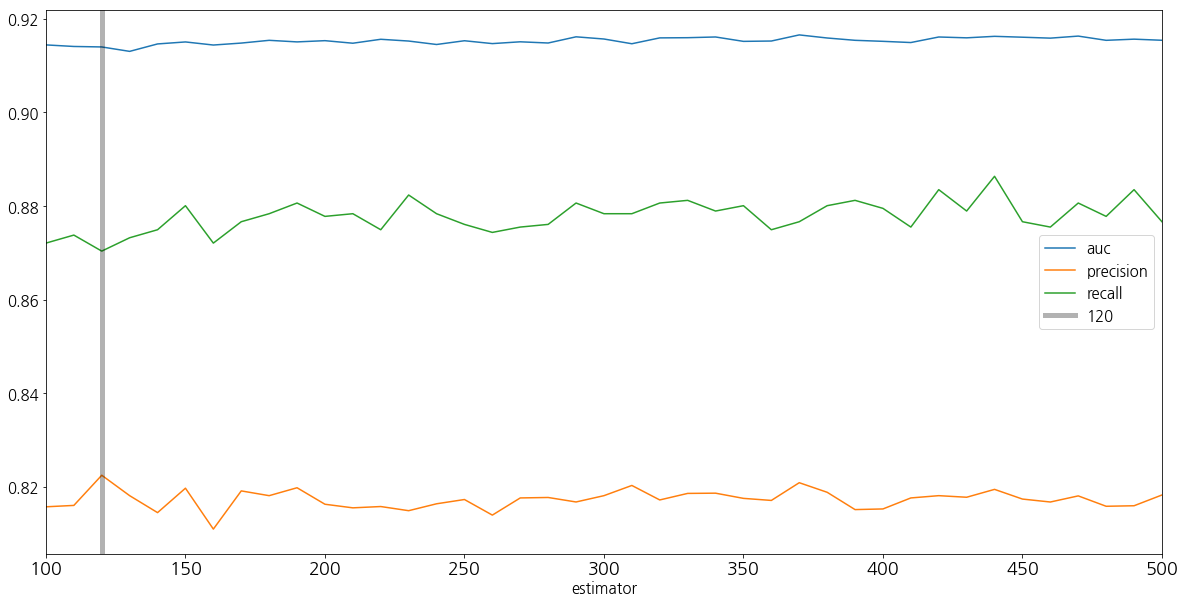

In [36]:
plt.rcParams['legend.fontsize'] = 15
result = pd.DataFrame(ret)
_, ax = plt.subplots(figsize = (20, 10))
for col in result.columns:
    if col == 'estimator':
        continue
    result[[col, 'estimator']].plot(kind = 'line', ax = ax, label = col, x = 'estimator')

top1 = result.sort_values('precision', ascending = False).estimator.iloc[0]
ax.axvline(top1, color = 'black', 
           linewidth = 5, alpha = .3, clip_on = True, label = top1)
ax.legend()
ax.set_xlabel("estimator", size = 15)
result.sort_values('precision', ascending = False)[:5]

## 모델링 과정을 정리하자면

- 변수는 kl-divergence 기준으로 넣는다 + 카테고리형변수들은 더미화시켜서 넣는다.
- 정확도는 precision / recall 로 평가해본다. 쉽고 빠른 randomforest 모델을 이용한다.
- 그리고 파라미터 튜닝을 해서 estimator 의 수를 120 으로 셋업한다.

## 13) 음, 정확도는 어느정도 미트하는 거 같으니까 => 이 모델에서 주는 결과를 해석해봅시다

- 오, 역시 변수중요도를 보니 duration 이 압도적으로 큽니다.
    - 전화로 권유를 할 때, 잘 받아주는 사람한테 전화를 해야 한다라는 상식이 통하는 모델!
- 게다가 통장에 잔고도 어느 정도 있어야 하겠고 (생각해보니 자금규모가 어느정도 되는 사람에게 정기예금 가입을 권유해야 할테니까)
- 나이도 영향이 좀 있네요. (돈 버는 사람한테 전화해야 할테니까요. => 돈 버는 사람은 보통 나이대가 좁혀져 있죠.)
- 음, 월의 어느 시점 (월초/월중/월말 등) 에 컨택해야 하는지도 꽤 중요하군요.

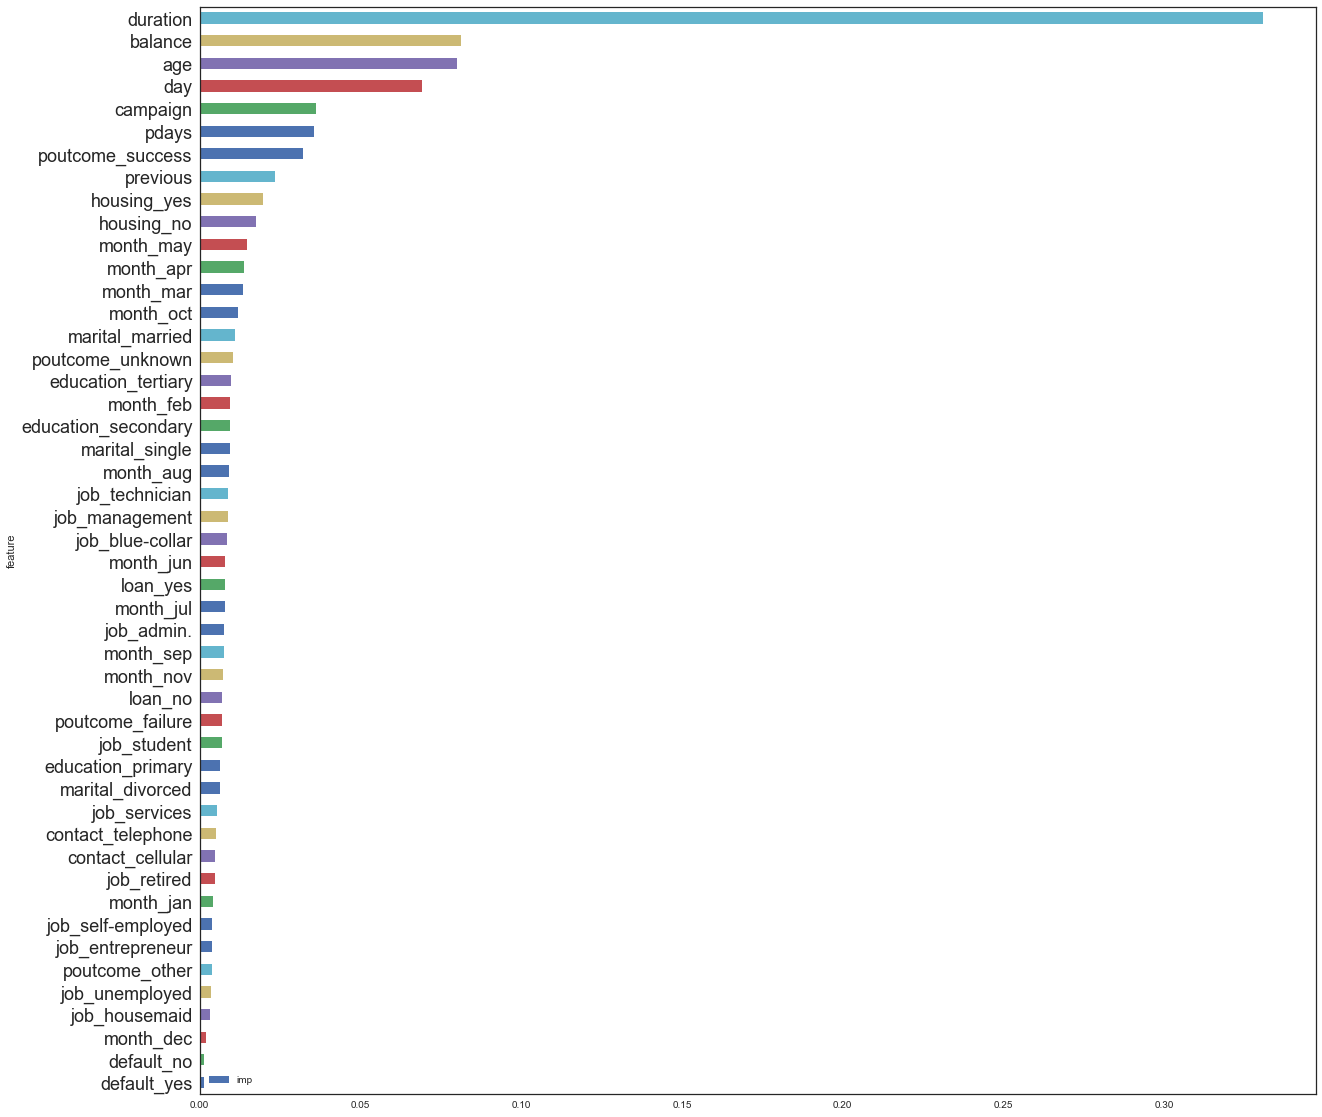

In [46]:
# 오! kl-divergence 에서 보았던 것이랑 거의 일치하는 듯 => 그리고 역시 모델링 돌리니까, 카테고리 변수에 대한 판단도 해주는 듯
_imp = pd.DataFrame({
    'feature' : x_train.columns,
    'imp' : model.feature_importances_
}).sort_values('imp', ascending = False)
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['ytick.labelsize'] = 18
_, ax = plt.subplots(figsize = (20, 20))
_imp.sort_values('imp').plot(kind = 'barh', x = 'feature', y = 'imp', ax = ax)

## 14) 좀 더 자세하게 볼까요? 중요도 높은 변수만 잘라서 말이죠.

- 좀 더 자세하게의 의미는 말이죠.
    - 이 모델이,
    - "정기예금가입할 거 같아요" 를 높은 확률로 예측하는 데이터와
    - "정기예금가입할 거 같지 않아요" 를 판단해주는 데이터로
    - 더 데이터의 범위를 좁힌 후,
- 이렇게 좁혀진 두 데이터를 놓고,
    - 중요도가 높은 변수들로 다시 해석해보는 거죠!

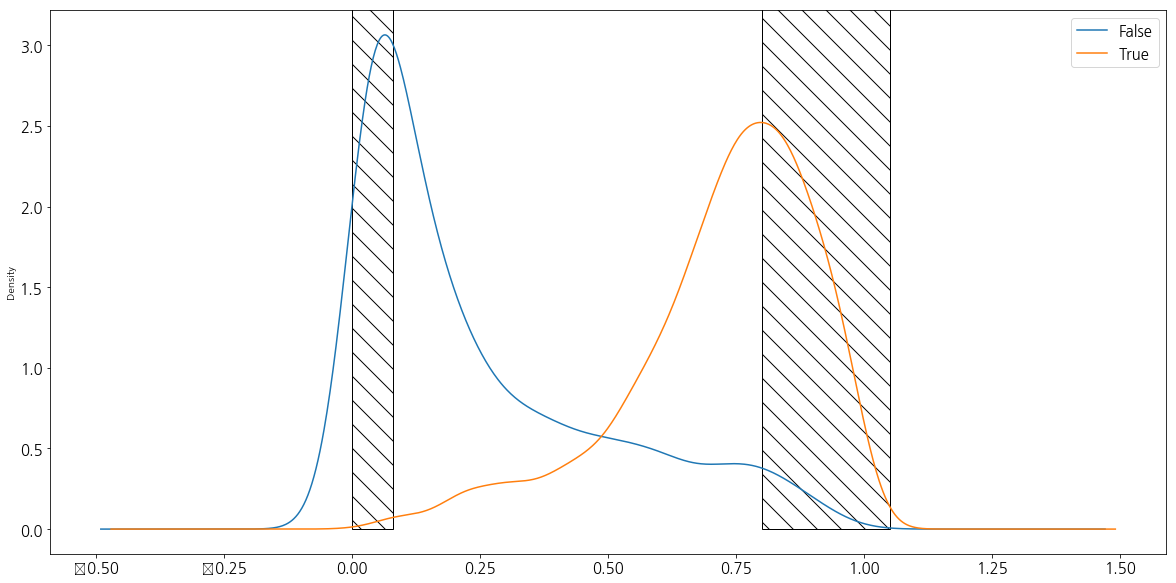

In [18]:
# 확률스코어분포
ts = x_test.copy()
ts['y_true'] = y_test
ts['y_predict'] = model.predict_proba(x_test)[:, 1]

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15

_, ax = plt.subplots(figsize = (20, 10))
for label in ts.y_true.unique():
    ts[ts.y_true == label].y_predict.plot(kind = 'kde', ax = ax, label = label)

import matplotlib.patches as patches
ax.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        .08,          # width
        3.5,          # height
        hatch='\\',
        fill = False
    )
)
ax.add_patch(
    patches.Rectangle(
        (0.8, 0),   # (x,y)
        .25,          # width
        3.5,          # height
        hatch='\\',
        fill = False
    )
)
ax.legend()

### 이렇게 보니까, 정기예금에 가입할 확률이 높은 집단과 그렇지 않은 집단의 차이가 보이긴 합니다.

- 캠페인 관련 전화통화를 더 길게 함은 물론, 예금(예치금)도 상대적으로 높네요. => 더 자세히 알고 싶어요. 수치적으로 말이죠.
- 이건 집단 말고 - **'개인의 확률 스코어'**가 높게 나왔다면 **'왜 높게 나왔는지'**도 알 수 있는 방법이 있다면 그것으로 해결될 수 있을 거 같아요.

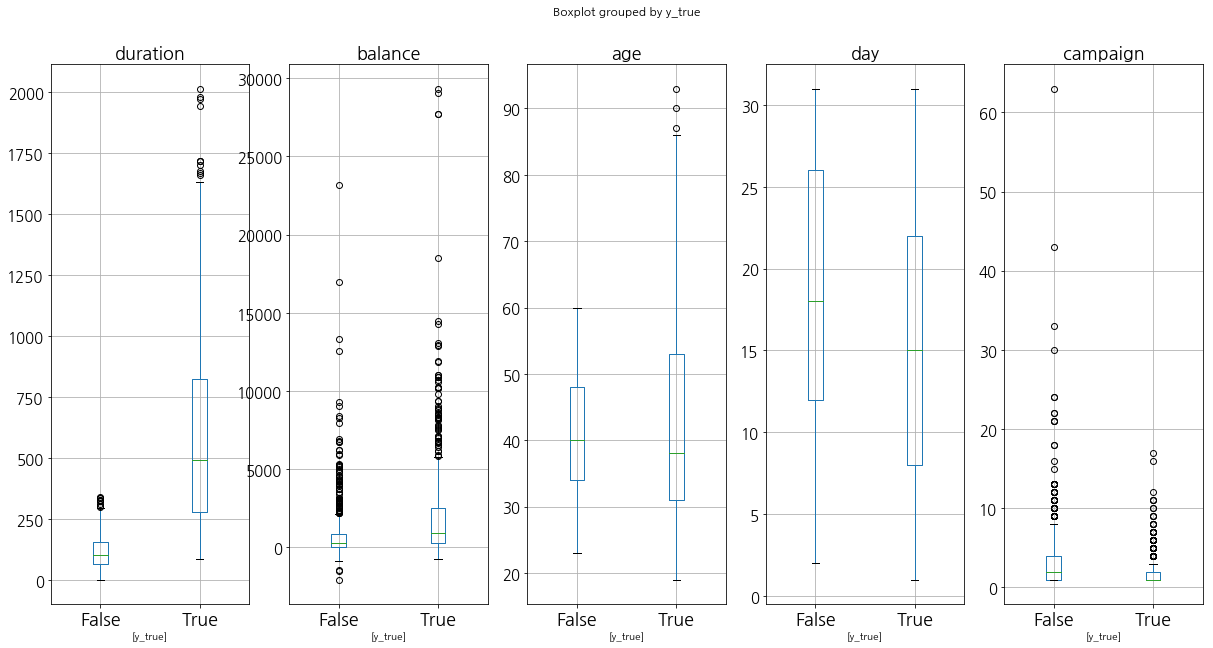

In [19]:
# duration, balance, age, day, campaign => True Positive / True Negative 끼리 비교해보자
ts_upper = ts[(ts.y_true == True) & (ts.y_predict >= .75)]
ts_lower = ts[(ts.y_true == False) & (ts.y_predict <= .08)]

itp = pd.concat([ts_upper, ts_lower])
plt.rcParams['xtick.labelsize'] = 18
_, ax = plt.subplots(1, 5, figsize = (20, 10))
cnt = 0
for col in ['duration', 'balance', 'age', 'day', 'campaign']:
    cnt = cnt + 1
    idx = int((cnt-1) / 5 + 1)
    idy = int((cnt-1) % 5 + 1)
    itp[['y_true', col]].boxplot(by = 'y_true', ax = ax[idy - 1])
    ax[idy - 1].set_title(col, size = 18)

## 15) 자, 그럼 개인의 확률 스코어가 .9 인 사람 1명을 뽑아서 왜 그런 스코어가 나왔는지 봅시다.

- 이런 걸 할 수 있는 방법으론, local interpretable model-agnostic explanations, 줄여서 LIME 이라는 방법을 사용해요.

- 이 LIME 이란?
    - 1) 일단 아래 그림과 같이 특정 개구리 사진을 넣었을 때 .54의 확률 스코어를 줄 수 있는 모델이 있다고 생각해봐요.
    - 2) 개구리 사진과 조금 씩 다르지만 비슷한 사진을 만들어서 (이걸 perturbed instances 라 해요)
    - 3) 그것들을 이 모델에 넣었을 때, 어떤 확률 스코어 값으로 나오는지 확인한 후
    - 4) **이 perturbed instances & 스코어 쌍**을 이용해서 **설명력이 큰 선형 모델**을 만들어,
    - 5) 당최 이 특정 개구리 사진이 왜 .54의 확률 스코어를 받았는지에 대해 확인하는 방법
        - **선형 모델은 계수들이 있잖아요.** **그 계수의 부호 / 그리고 값의 크기**가 바로 **이 모델이 왜 그렇게 동작하는 지**를 확인시켜주는 거죠.

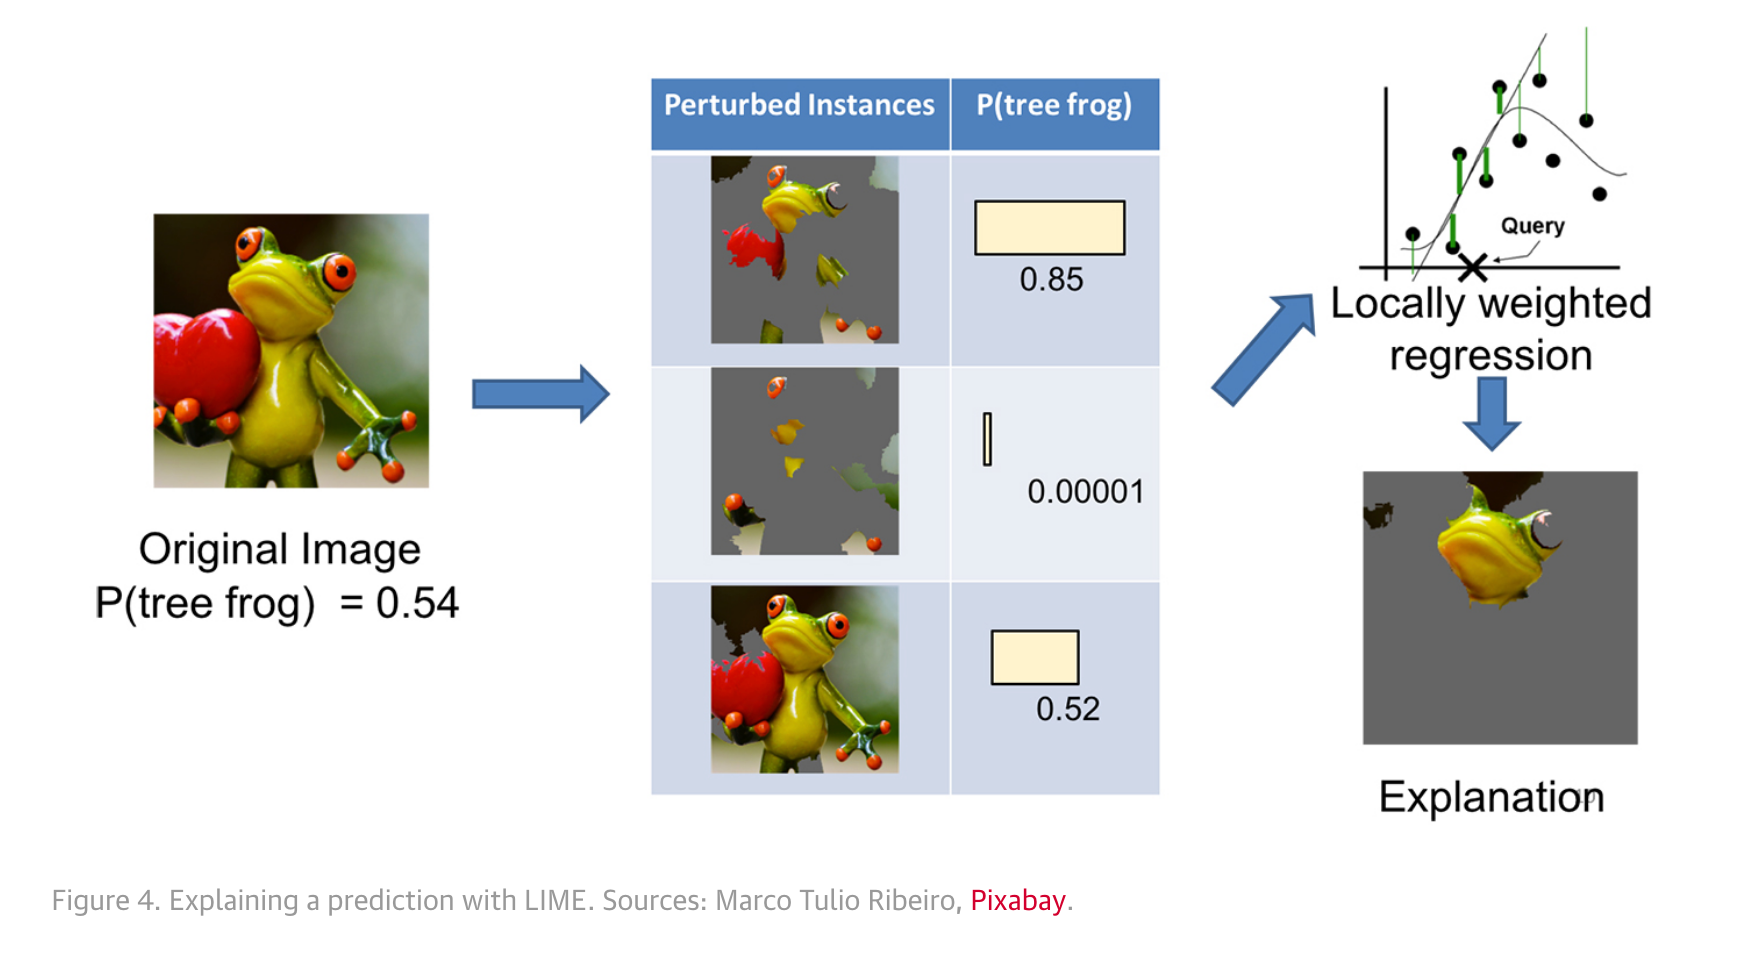

In [25]:
from IPython.display import Image                        
url='./lime.png'
Image(url,width=900, height=900)

### 정기예금가입확률이 .9 이상인 고객을 한명 선택 => 왜 .9 를 넘게 되는 지를 lime 을 통해서 봅시다

In [29]:
test_pred = pd.DataFrame({
    'idx'   : x_test.index,
    'score' : y_predict_score,
    'y_true': y_test
})
print(test_pred[test_pred.score >= .9].iloc[0])
x_test[x_test.index == 3432]
# idx = 2812, 이걸 한번 파악해보는 것으로

idx       3432
score     0.96
y_true    True
Name: 3432, dtype: object


age  balance  day  duration  campaign  pdays  previous  job_admin.  \
3432   38     1711   20       379         3    202         1           0   

      job_blue-collar  job_entrepreneur        ...         month_jun  \
3432                0                 0        ...                 0   

      month_mar  month_may  month_nov  month_oct  month_sep  poutcome_failure  \
3432          0          0          0          0          0                 0   

      poutcome_other  poutcome_success  poutcome_unknown  
3432               0                 1                 0  

[1 rows x 48 columns]

### 실제로도 가입성공했나요?

- 네, 성공했군요

In [33]:
# 실제로도 가입 권유 했을 때, 성공했나요? => 네, 성공했군요
test_pred[test_pred.index == 3432].y_true

3432    True
Name: y_true, dtype: bool

### 자, 그럼 lime 을 활용해서 이 고객의 확률스코어가 .96인지 확인해봅시다

In [25]:
# 자, 그럼 lime 을 활용해봅시다.
# !pip install lime
class_names = ['no', 'yes'] # 정기예금가입여부

import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values,
                                                   feature_names = x_train.columns.tolist(), 
                                                   class_names = class_names)


i = 3432
exp = explainer.explain_instance(x_test[x_test.index == i].T.unstack().values, model.predict_proba, 
                                 num_features=x_train.columns.shape[0], top_labels = 1)

In [26]:
exp.show_in_notebook(show_table = True, show_all = True)

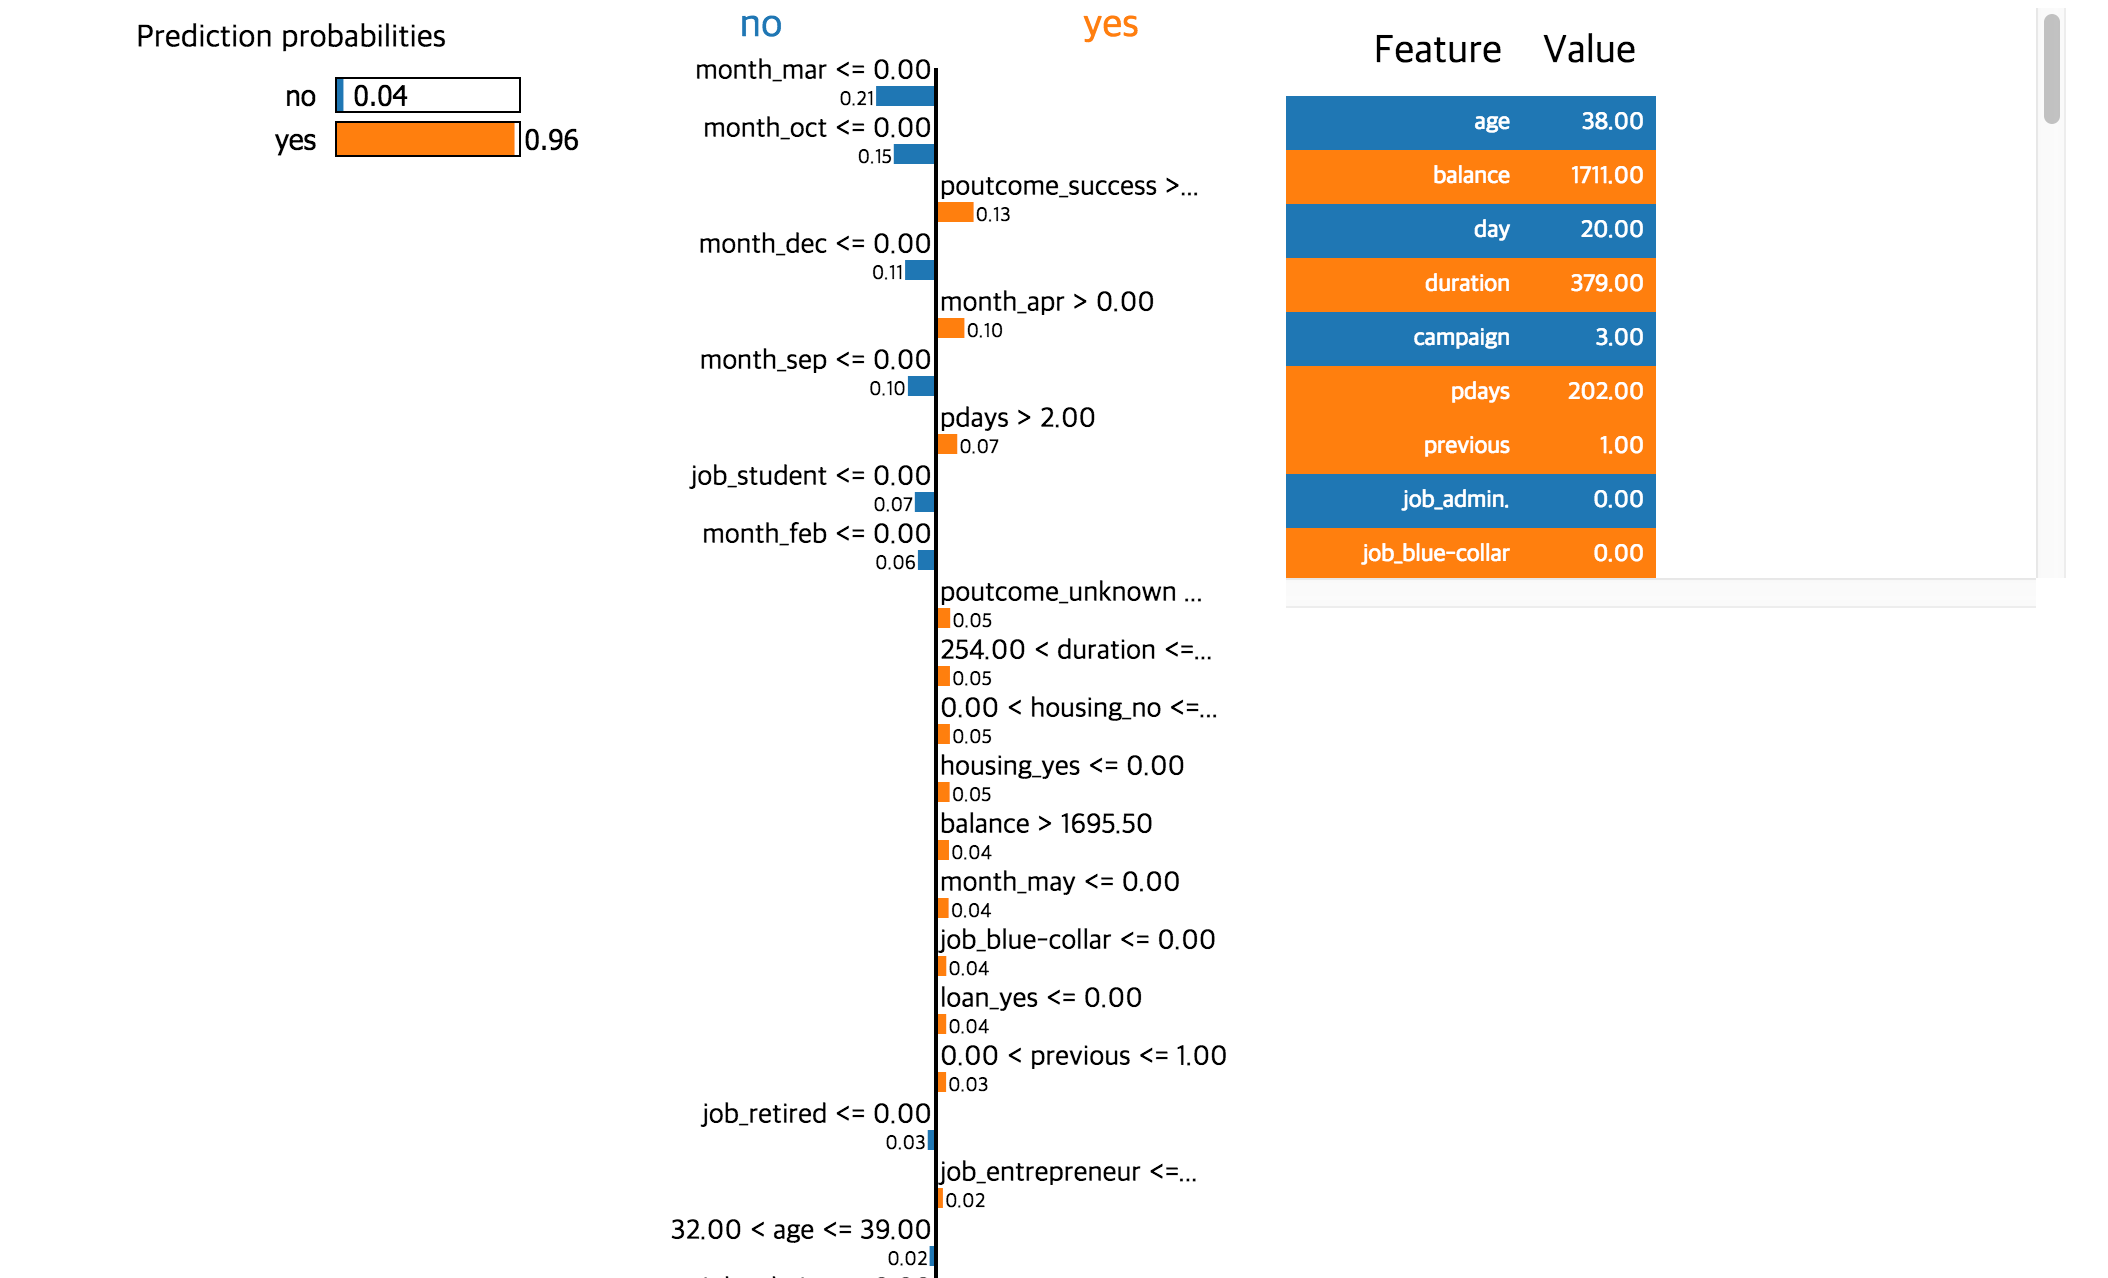

In [45]:
from IPython.display import Image                        
url='./lime_result.png'
Image(url,width=900, height=900)

### 어때요? .96의 확률스코어를 가지고 있는 (실제로도 가입성공했구요) 3432번 고객이 왜 이런 스코어를 받게 되었는지 딱 한눈에 알 수 있게 되었어요.

- 이 고객에게 정기예금건으로 권유를 하면 성공할 이유 중 가장 큰 이유는

    - **직전 캠페인**을 이 고객에 대해서 했을 때, 성공했기 때문입니다.
    - **게다가 4월 이후로 컨택**을 해야 잘 먹히는 데, 그렇게 했기 때문이구요.
    - **또한 직전 캠페인을 한지 이틀 이상 이후**에 '정기예금가입권유'를 해야 하는데, 그렇게 했구요.

## 16) 어? 그런데 살짝 아쉬운 부분이 있어요.

- 고확률스코어로 모델에서 예측을 하면 그만큼 잘 맞추어야 하는 건데
- 고확률스코어 부분에서 그래프가 하강하고 있어요. => 즉, 고확률스코어에서 잘 못 맞춘다는 거죠. => 이걸 개선하고 싶어요 ㅠ

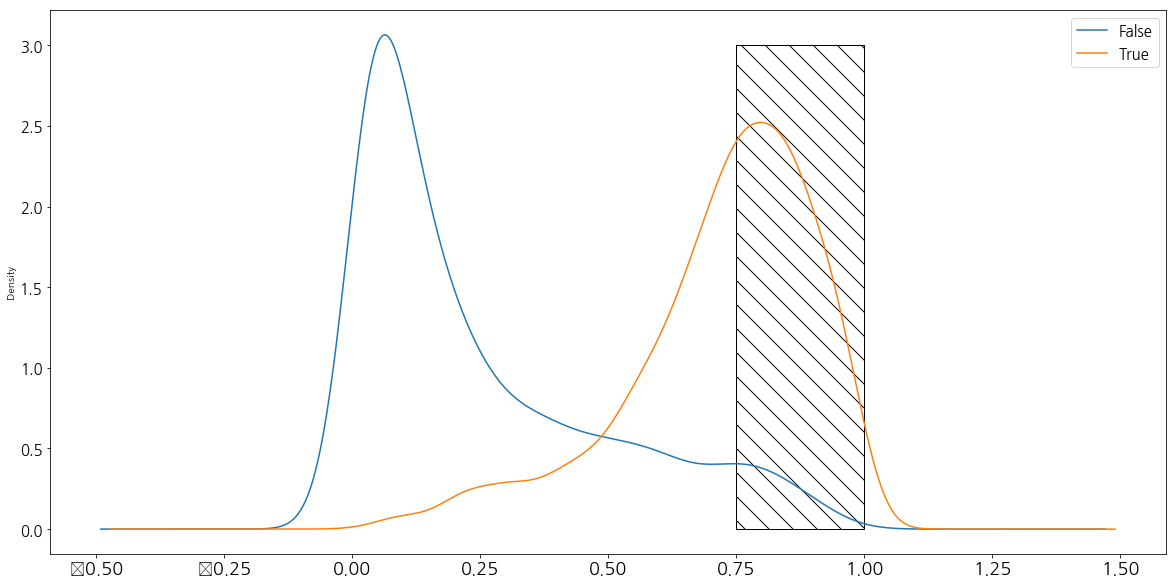

In [34]:
## 여튼 이렇게 해석할 수 있는데 ;
## 그런데, 아쉬운 점은 => 이 부분의 역전현상이 일어나서 => 알고리즘을 수정했으면 좋겠음
ts = x_test.copy()
ts['y_true'] = y_test
ts['y_predict'] = model.predict_proba(x_test)[:, 1]

_, ax = plt.subplots(figsize = (20, 10))
for label in ts.y_true.unique():
    ts[ts.y_true == label].y_predict.plot(kind = 'kde', ax = ax, label = label)

import matplotlib.patches as patches
ax.add_patch(
    patches.Rectangle(
        (0.75, 0),   # (x,y)
        .25,          # width
        3,          # height
        hatch='\\',
        fill = False
    )
)
ax.legend()

## 17) 이건 알고리즘의 문제인 거 같아요. 지금 RandomForest 하나로 어떻게든 해보겠다고 ... 한거거든요.

- 그래서 다양한 알고리즘을 일단 붙여보기로 했어요.
- 물론 이런 binary classfication 문제를 잘 푸는 계열로 주욱 골라서 말이죠.
    - 로지스틱부터, 부스팅기법, 나이브베이즈 ... 되는 데로 다 돌려봐요 일단
- 어? 그러니까 GradientBoostingClassifier 의 성능이 좋다고 올라오는구만요!

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, x_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, x_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, x_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, x_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, x_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, x_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, x_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

Classifiers  Crossval Mean Scores
4         Grad B CLF              0.831638
5            Rand FC              0.822679
0      Logistic Reg.              0.809173
3           Dec Tree              0.756886
2                KNN              0.739637
6  Neural Classifier              0.698573
7       Naives Bayes              0.698573
1                SVC              0.524873

## 18) 그래요! Gradient Boosting 으로 최적화시켜보는 겁니다.

- 흠 estimator = 470개 일 때, 성능이 가장 좋군요.
    - 성능에 대한 fluctuation 은 역시 거의 없습니다.
    - 튜닝의 의미가 거의 없다고 볼 수 있겠죠? => 하지만 고 확률 스코어 부분의 하강 패턴은 한번 봐야 합니다.
- 확률분포그림은 어때요? 여전히 고확률스코어 부분에 하강하는 패턴이 아직도 보이나요? => 오! 하강구간이 엄청 짧아졌어요.

In [38]:
ret_grad = []
from tqdm import tqdm
for estimator in tqdm(range(100, 510, 10)):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier(n_estimators = estimator)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    y_predict_score = model.predict_proba(x_test)[:, 1]
    from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
    ret_grad.append({
        "estimator" : estimator,
        "precision" : precision_score(y_test, y_predict),
        "recall"    : recall_score(y_test, y_predict),
        "auc"       : roc_auc_score(y_test, y_predict_score)
    })

100%|██████████| 41/41 [01:57<00:00,  2.86s/it]


auc  estimator  precision    recall
37  0.921943        470   0.839074  0.848658
36  0.921983        460   0.837945  0.847516
27  0.921918        370   0.837761  0.846374
38  0.921952        480   0.837746  0.849229
34  0.922018        440   0.837472  0.847516

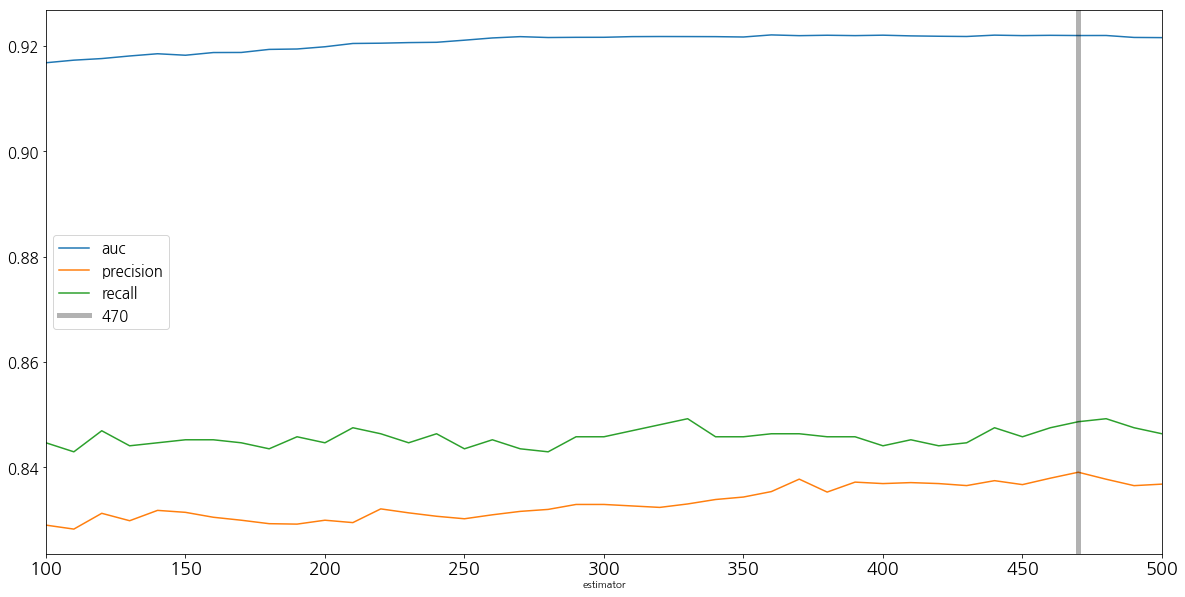

In [39]:
# plt.rcParams['legend.fontsize'] = 15
result = pd.DataFrame(ret_grad)
_, ax = plt.subplots(figsize = (20, 10))
for col in result.columns:
    if col == 'estimator':
        continue
    result[[col, 'estimator']].plot(kind = 'line', ax = ax, label = col, x = 'estimator')

top1 = result.sort_values('precision', ascending = False).estimator.iloc[0]
ax.axvline(top1, color = 'black', 
           linewidth = 5, alpha = .3, clip_on = True, label = top1)
ax.legend()
result.sort_values('precision', ascending = False)[:5]

### 고확률스코어 구간의 하강패턴을 한번 비교해봅시다.

- GradientBoostingClassifier 의 하강패턴이 훨씬 짧군요!
- 이 모델로, **정기예금가입권유** 를 할 대상 고객에 대한 스코어링을 하면 좋을 거 같네요

In [43]:
model_rf = RandomForestClassifier(n_estimators = estimator, n_jobs = 4)
model_rf.fit(x_train, y_train)

model_gb = model

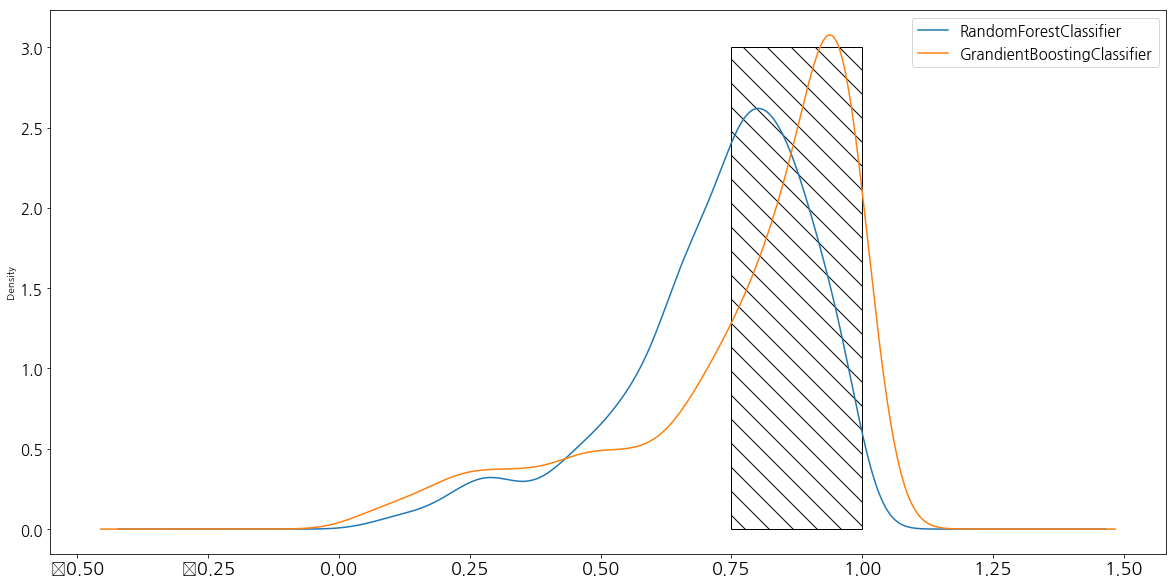

In [44]:
ts = x_test.copy()
ts['y_true'] = y_test
ts['y_predict_rf'] = model_rf.predict_proba(x_test)[:, 1]
ts['y_predict_gb'] = model_gb.predict_proba(x_test)[:, 1]

_, ax = plt.subplots(figsize = (20, 10))
# for label in ts.y_true.unique():
ts[ts.y_true == True].y_predict_rf.plot(kind = 'kde', ax = ax, label = 'RandomForestClassifier')
ts[ts.y_true == True].y_predict_gb.plot(kind = 'kde', ax = ax, label = 'GrandientBoostingClassifier')

import matplotlib.patches as patches
ax.add_patch(
    patches.Rectangle(
        (0.75, 0),   # (x,y)
        .25,          # width
        3,          # height
        hatch='\\',
        fill = False
    )
)
ax.legend()

## 정리하자면!

- 아무한테나 정기예금에 가입하세요! 라고 전화를 하는 것은 **정말 비효율적인 일**이라는 것!
- 그래서 고객별로 **정기예금에 가입할 고객**에 대한 확률스코어를 뽑을 수 있는 **확률모델**을 만들어 보는 거에요.
- 확률모델을 만드는 과정은 다음과 같을 겁니다

    - 1) 먼저 데이터를 확인해야겠죠? 그리고 결측치가 어떻게 형성되어 있는지도 확인해보구요.
    - 2) 그 후 정기예금가입여부라는 타겟값에 따라서 변수들의 값의 차이가 어떻게 발생하는 지 K-L Divergence 와 같은 메트릭으로 한번 보는 겁니다.
    - 3) 이걸로 솎아진 변수들을 이용해서 가볍게 모델링을 해본 후, 이 모델의 성능 및 스코어 분포를 확인해보는 거에요.
    - 4) 그리고 고스코어군과 저스코어군을 나누는 러프한 기준을 탐색해보는 겁니다. 
        - 그냥 스코어만 보고서 전화를 한다. 와 같은 행동은 "너무 위험하니까요"
        - 이 스코어가 왜 이렇게 나왔는지를 탐색하는 행위를 통해서, "이 스코어 이상 정도 되면 전화를 하면 되겠다" 와 같은 근거가 나오는 셈이니까요.
    - 5) 또는 고스코어 고객 하나를 집어서, 이 고객이 왜 고스코어를 받았는지에 대해 탐색해보는 시도도 할 수 있구요.
    - 6) 자 어느정도 근거가 확보되었다고 생각된 후, 다시 확률스코어분포를 쳐다봅시다. 
        - 고스코어로 갈 수록 그래프가 높아져야 하는데, 하강하고 있군요. => 이건 문제가 좀 있어요.
        - 이 문제를 해결하기 위해, 알고리즘 및 하이퍼파라미터에 대한 추가 탐색이 필요할 거 같아요. => 그래서 grid / random search 같은 것을 할 수 있겠죠?
        - grid/random search의 결과 => 괜찮은 알고리즘 및 하이퍼파라미터를 얻을 수 있게 되요.
            - 자! 잊지 마세요. 이 search 의 목적은 고스코어 구간에서 그래프 하강 현상을 막는 데에 있으니까요.
            - 그래서 스코어분포를 비교해보는 겁니다. 목적을 달성했는지요. => 다행히 목적을 어느정도 달성을 했군요.
            
            
- 이런 과정을 거친 후, 비로소 **정기예금에 가입할 고객**에 대한 확률스코어를 꽤 정확하게 얻게 되요. 
- 게다가 이 확률스코어가 왜 이렇게 나왔는지에 대한 정보도 같이 생겨서, 제대로 행동할 정량적인 근거도 확보하게 되는 거구요.